# Scenario discovery & trade-off analysis

Check robustness of policies
- PRIM
- Sobol
- Exam trade-offs

Evt: MORO - dan ook aanpassen in tekst - checken robustness

Uitzoeken: multi-scenario mordm toepassen

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt


In [2]:
from SALib.analyze.sobol import analyze

In [3]:
dike_model, planning_steps = get_model_for_problem_formulation(2)

In [4]:
problem = get_SALib_problem(dike_model.uncertainties)
problem

{'num_vars': 19,
 'names': ['A.0_ID flood wave shape',
  'A.1_Bmax',
  'A.1_Brate',
  'A.1_pfail',
  'A.2_Bmax',
  'A.2_Brate',
  'A.2_pfail',
  'A.3_Bmax',
  'A.3_Brate',
  'A.3_pfail',
  'A.4_Bmax',
  'A.4_Brate',
  'A.4_pfail',
  'A.5_Bmax',
  'A.5_Brate',
  'A.5_pfail',
  'discount rate 0',
  'discount rate 1',
  'discount rate 2'],
 'bounds': [(0, 133),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (30, 350),
  (0, 3),
  (0, 1),
  (0, 4),
  (0, 4),
  (0, 4)]}

In [5]:
experiments = pd.read_csv('data/output_data/experiments_scenario_discovery_10s_sobol.csv', index_col=None)
print(f"Shape of data: {experiments.shape[0]} rows, {experiments.shape[1]} columns.")
experiments.head(10)

Shape of data: 3600 rows, 54 columns.


,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,0,0,dikesnet
1,1,101,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,1,0,dikesnet
2,2,34,230.780348,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,2,0,dikesnet
3,3,34,82.144825,10.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,3,0,dikesnet
4,4,34,82.144825,1.0,0.708126,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,4,0,dikesnet
5,5,34,82.144825,1.0,0.185025,138.086776,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,5,0,dikesnet
6,6,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,1.5,...,1,5,1,2,7,0,0,6,0,dikesnet
7,7,34,82.144825,1.0,0.185025,36.183953,1.5,0.873721,308.202626,1.5,...,1,5,1,2,7,0,0,7,0,dikesnet
8,8,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,138.025520,1.5,...,1,5,1,2,7,0,0,8,0,dikesnet
9,9,34,82.144825,1.0,0.185025,36.183953,1.5,0.575771,308.202626,10.0,...,1,5,1,2,7,0,0,9,0,dikesnet


In [6]:
results = pd.read_csv('data/output_data/results_scenario_discovery_10s_sobol.csv', index_col=None)
print(f"Shape of data: {results.shape[0]} rows, {results.shape[1]} columns.")
results.head(10)

Shape of data: 3600 rows, 6 columns.


,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
1,1,9.662522e+07,2.272627e+08,30700000.0,1568.221124,0.008212
2,2,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
3,3,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
4,4,0.000000e+00,2.272627e+08,30700000.0,0.000000,0.000000
5,5,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
6,6,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
7,7,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
8,8,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354
9,9,9.804904e+07,2.272627e+08,30700000.0,1624.073114,0.008354


In [7]:
results['Expected Annual Damage'].shape

(3600,)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

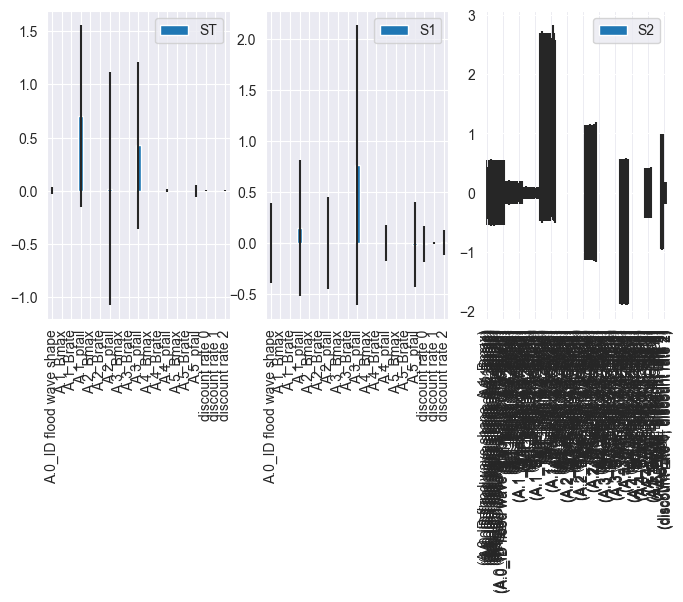

In [13]:
sobol_results = {}

for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    y = results.loc[logical,'Expected Annual Damage'].values
    indices = analyze(problem, y)
    sobol_results[policy] = indices

fig, axes = plt.subplots(1,3)
fig.set_size_inches(8, 4)
indices.plot(ax=axes)

In [ ]:
# Read and view the data
data = pd.read_csv('data/output_data/policies.csv', index_col=None)
print(f"Shape of data: {data.shape[0]} rows, {data.shape[1]} columns.")
data.head(3)

In [ ]:
# Select the experiments
x = data.iloc[:, 2:11] #zelf verzetten naar goede aantal colommen
print(f"Columns in x: {x.columns.values}")

In [ ]:
# Select the outcome
y = data.iloc[:, 15].values #zelfde hiervoor

## Prim

In [ ]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

In [ ]:
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
point = 19
box1.inspect(point)

In [ ]:
box1.inspect(point, style='graph')
plt.show()

In [ ]:
box1.resample(point)

In [ ]:
box1.select(21)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [ ]:
# Read and select the data
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7]
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [ ]:
# Peel alpha controls the leniency of the algorithm, the higher, the less lenient
# The meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16,
                     peel_alpha=0.01)
box2 = prim_obj.find_box()

In [ ]:
# Plot the trade-off curve
box2.show_tradeoff(annotated=True)
plt.show()

In [ ]:
# Inspect a specific point on the trade-off curve
box2.inspect(3)
plt.show()